In [140]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [141]:
def initial_pop(pop_size=10,n_genotype=3,first_num=0,final_num=100):
    data = np.arange(first_num,final_num)
    all_pop = np.random.choice(data,(pop_size, n_genotype))
    return all_pop

In [142]:
def fitness(pop_digit,pop_rock): #1*-1 dimension
    mean_rock = sum(pop_rock[0])/len(pop_rock[0])
    #mean_rock = 500
    #print("mean of rocks :",mean_rock)
    new_rock = []
    fitness_rock = []
    sum_row = 0
    rms_row = 0
    for p in pop_digit:
        idx = np.argsort(p) #sort small to big
        rock = pop_rock[0][idx]
        new_rock.append(rock)
        r = rock.reshape((8,10))
        for i in range(0,8):
            for j in range(0,10):
                sum_row += r[i][j]
            #print("sum_row",i,sum_row)
            rms_row += (sum_row-mean_rock*10)**2
            #print("rms_row ",i,rms_row)
            sum_row = 0
        fitness_rock.append(rms_row)
        rms_row = 0
    idx_best = np.argsort(fitness_rock)
    pop_digit = pop_digit[idx_best]
    fitness_rock = np.array(fitness_rock).reshape(1,-1)[0][idx_best]
    new_rock = np.array(new_rock)[idx_best]
    return pop_digit,new_rock,fitness_rock

In [143]:
def crossover(pop,p_cross=0.7,n_genotype=3,p_size=10):
    for k in range(2,p_size,2): 
        if np.random.rand()<p_cross:
            parent = np.random.randint(0,p_size, 2) 
            crosspoint1 = np.random.randint(0, n_genotype)
            crosspoint2 = np.random.randint(crosspoint1, n_genotype)
            offsprint1 = np.concatenate((pop[parent[0]][:crosspoint1],pop[parent[1]][crosspoint1:crosspoint2],pop[parent[0]][crosspoint2:]))
            offsprint2 = np.concatenate((pop[parent[1]][:crosspoint1],pop[parent[0]][crosspoint1:crosspoint2],pop[parent[1]][crosspoint2:]))
            pop[k] = offsprint1
            pop[k+1] = offsprint2
            
            #print("which",k,k+1)
            #print("parent",parent)
            #print("position",crosspoint1,crosspoint2)
    return pop

In [144]:
def mutattion(pop,p_mutate=0.2,n_genotype=3,p_size=10,first_posi=0,final_posi=100):
    data = np.arange(first_posi,final_posi)
    for k in range(1, p_size):
        if np.random.rand() < p_mutate:
            
            mutatepoint1 = np.random.randint(1, n_genotype)
            mutatepoint2 = np.random.randint(1, n_genotype)
            mutatepoint3 = np.random.randint(1, n_genotype)
            pop[k][mutatepoint1] = np.random.choice(data)
            pop[k][mutatepoint2] = np.random.choice(data)
            pop[k][mutatepoint3] = np.random.choice(data)
            
            #print(k) 
            #print(mutatepoint1)
            #print(pop[k][mutatepoint1])
    return pop

# 1.Import Dataset

In [145]:
df = pd.read_excel("data-test-j.xlsx")
pop_rock = np.array(df).reshape(1,-1)
pop_rock

array([[22.3, 23.5, 23.8, 23.8, 24. , 24. , 24. , 24.2, 24.2, 24.3, 22.5,
        23.7, 23.8, 23.8, 24. , 24. , 24.2, 24.2, 24.2, 24.3, 22.8, 23.7,
        23.8, 23.8, 24. , 24. , 24.2, 24.2, 24.2, 24.3, 22.8, 23.7, 23.8,
        23.8, 24. , 24. , 24.2, 24.2, 24.2, 24.3, 23. , 23.8, 23.8, 23.8,
        24. , 24. , 24.2, 24.2, 24.2, 24.5, 23. , 23.8, 23.8, 24. , 24. ,
        24. , 24.2, 24.2, 24.2, 24.5, 23. , 23.8, 23.8, 24. , 24. , 24. ,
        24.2, 24.2, 24.3, 24.6, 23.5, 23.8, 23.8, 24. , 24. , 24. , 24.2,
        24.2, 24.3, 24.7]])

In [166]:
n_iter = 50
p_size = 20
n_genotype = 80
p_cross = 0.7
p_mutate=0.7

pop_digit = initial_pop(p_size,n_genotype,0,100)
best_pop = []
best_rock = []
best_fitness = []
z=0

iteration:1 [fitness = 4.039999999999898783187290973729] 
iteration:2 [fitness = 4.039999999999898783187290973729] 
iteration:3 [fitness = 1.619999999999974793496448910446] 
iteration:4 [fitness = 1.619999999999974793496448910446] 
iteration:5 [fitness = 0.659999999999947739581784844631] 
iteration:6 [fitness = 0.659999999999947739581784844631] 
iteration:7 [fitness = 0.659999999999947739581784844631] 
iteration:8 [fitness = 0.659999999999947739581784844631] 
iteration:9 [fitness = 0.659999999999947739581784844631] 
iteration:10 [fitness = 0.659999999999947739581784844631] 
iteration:11 [fitness = 0.659999999999947739581784844631] 
iteration:12 [fitness = 0.659999999999947739581784844631] 
iteration:13 [fitness = 0.659999999999947739581784844631] 
iteration:14 [fitness = 0.659999999999947739581784844631] 
iteration:15 [fitness = 0.659999999999947739581784844631] 
iteration:16 [fitness = 0.659999999999947739581784844631] 
iteration:17 [fitness = 0.659999999999947739581784844631] 
iterat

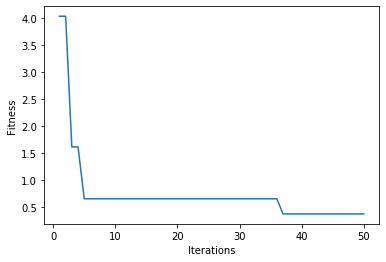

In [167]:
while z<n_iter:
    z+=1
    group_solu = fitness(pop_digit,pop_rock)
    best_pop.append(group_solu[0][0])
    best_rock.append(group_solu[1][0])
    best_fitness.append(group_solu[2][0])
    
    print('iteration:{} [fitness = {:.30f}] '.format(z,group_solu[2][0]))
    final_cross_pop = crossover(group_solu[0],p_cross,n_genotype,p_size)
    final_mutate_pop = mutattion(final_cross_pop,p_mutate,n_genotype,p_size,0,100)
    pop_digit = final_mutate_pop 
plt.clf()
xticks = range(1, len(best_fitness)+1)
plt.plot(xticks, best_fitness)
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.pause(1e-10)
plt.show()

In [168]:
idex_final = np.argsort(best_fitness) #sort small to big
print("best rock: fitness = {}\n{}".format(best_fitness[idex_final[0]],best_rock[idex_final[0]].reshape((8,10))))

best rock: fitness = 0.3799999999999909
[[24.  24.  24.  24.  24.2 24.2 22.8 23.7 23.8 24.6]
 [24.  24.  24.3 23.8 24.2 23.7 24.  23.  24.3 24. ]
 [23.8 24.2 23.8 24.2 24.  23.8 24.2 23.  24.  24. ]
 [24.2 22.8 24.  23.8 24.3 24.  24.2 24.  23.7 24.2]
 [24.3 23.8 24.2 24.2 24.2 22.5 24.2 24.2 23.8 23.8]
 [23.8 23.8 23.  24.  23.8 24.  23.8 24.3 24.2 24.5]
 [24.5 24.  24.3 23.8 24.  24.  24.  22.3 24.2 24.7]
 [23.5 24.2 23.8 23.5 23.8 24.2 23.8 24.2 24.2 24.2]]


In [169]:
r = best_rock[idex_final[0]].reshape((8,10))
sum_row = 0
for i in range(0,8):
    for j in range(0,10):
        sum_row += r[i][j]
    print(sum_row)
    sum_row = 0

239.3
239.3
239.0
239.19999999999996
239.2
239.2
239.79999999999998
239.39999999999998


In [170]:
#239.2, 239, 239.5, 239.5, 239.2, 239, 239.5, 239.5

best = np.array(best_fitness).reshape(1,-1)[0][idex_final]
print(best)

[0.38 0.38 0.38 0.38 0.38 0.38 0.38 0.38 0.38 0.38 0.38 0.38 0.38 0.38
 0.66 0.66 0.66 0.66 0.66 0.66 0.66 0.66 0.66 0.66 0.66 0.66 0.66 0.66
 0.66 0.66 0.66 0.66 0.66 0.66 0.66 0.66 0.66 0.66 0.66 0.66 0.66 0.66
 0.66 0.66 0.66 0.66 1.62 1.62 4.04 4.04]
